<a href="https://colab.research.google.com/github/kamrankop/regressions/blob/master/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)

# step1: generate a random N=1000 random samples from a poisson distribution with mean of lambda
lambda_value = 10
N = 10000
DataPopulation = np.random.poisson(lam=lambda_value, size=N)

# step2: Draw a random subset of n=30 samples from DataPopulation
n = 200
DataSample = np.random.choice(DataPopulation, size=n, replace=False)

# step 3: Compute the mean and standard deviation of both vectors
mean_population = np.mean(DataPopulation)
std_population = np.std(DataPopulation)

mean_sample = np.mean(DataSample)
std_sample = np.std(DataSample)

# print results

print("Population Mean: ", mean_population)
print("Population Standard Deviation: ", std_population)
print("Sample Mean: ", mean_sample)
print("Sample Standard Deviation: ", std_sample)


Population Mean:  10.0186
Population Standard Deviation:  3.144813832327758
Sample Mean:  10.17
Sample Standard Deviation:  2.8828978476526013


In [3]:
# Now, we have our sample mean, and we assume that this is the mean value of our poisson distribution.
# We are going to generate the best fit poisson dist. from our sample mean, and plot it against the histogram of our population.

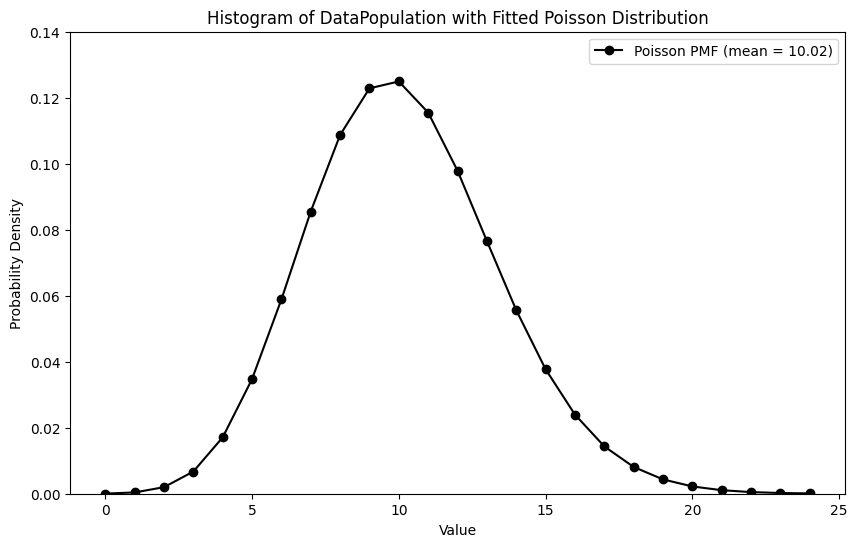

In [12]:
from scipy.stats import poisson

# Generate a histogram of DataPopulation
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(DataPopulation, bins=19, color='blue', edgecolor='black', alpha=0, density=True)

# Plot the poisson distribition that best fits the sample mean
x = np.arange(0, bins[-1] + 1)
pmf_values = poisson.pmf(x, mu=mean_sample)
plt.plot(x, pmf_values, 'k-', marker='o', label=f'Poisson PMF (mean = {mean_population:0.2f})')

plt.ylim(0.00,0.14)

# label the axes
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of DataPopulation with Fitted Poisson Distribution')

# add legend
plt.legend()

# display plot
plt.show()

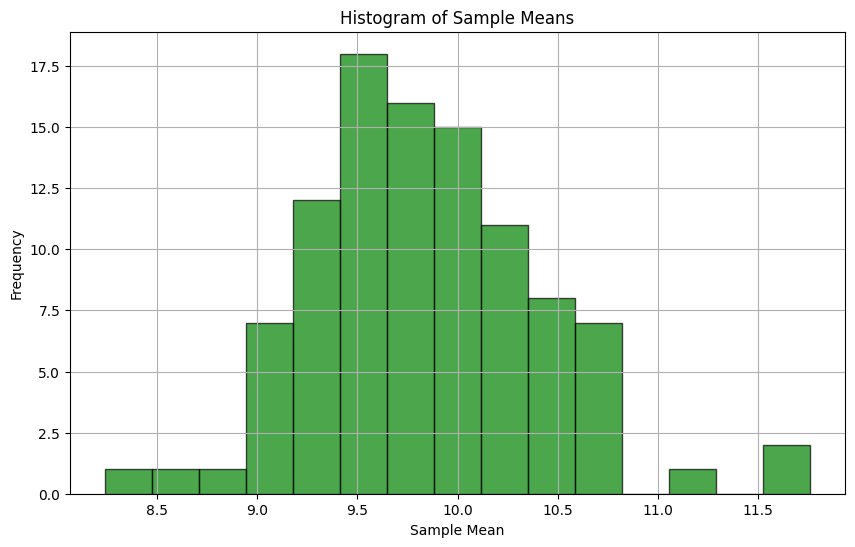

In [83]:
# step1: generate a random N=1000 random samples from a poisson distribution with mean of lambda
lambda_value = 10
N = 1000
DataPopulation = np.random.poisson(lam=lambda_value, size=N)

# parameters for sampling
n = 25   # sample size
m = 100   # number of samples to take

# initialize arrays to store sample means and std dev.s
SampleMeans = np.zeros(m)
SampleSTDs = np.zeros(m)

# Repeat sampling m times
for i in range(m):
  DataSample = np.random.choice(DataPopulation, size=n, replace=False)
  SampleMeans[i] = np.mean(DataSample)
  SampleSTDs[i] = np.std(DataSample)

# plot histogram of the SampleMeans
plt.figure(figsize=(10, 6))
plt.hist(SampleMeans, bins=15, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)

# display
plt.show()


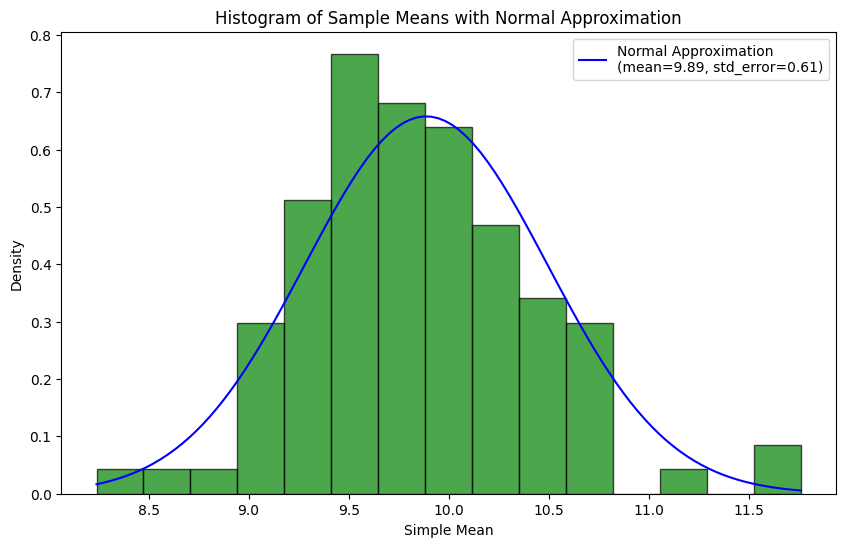

In [84]:
from scipy.stats import norm

# calculate the population mean and standard deviation
mean_population = np.mean(DataPopulation)
std_population = np.std(DataPopulation)

# compute the std dev of the sample means (standard error)
std_error = std_population / np.sqrt(n)

# generate the normal distribution that approximates the dist. of sample means
x = np.linspace(min(SampleMeans), max(SampleMeans), 100)
normal_approximation = norm.pdf(x, loc=mean_population, scale=std_error)

# Plot the histogram of the SampleMeans
plt.figure(figsize=(10, 6))
plt.hist(SampleMeans, bins =15, color='green', edgecolor='black', alpha=0.7, density=True)

# Plot the normal distribution approximation on top of histogram
plt.plot(x, normal_approximation, 'b-', label=f'Normal Approximation\n(mean={mean_population:0.2f}, std_error={std_error:0.2f})')

# label the axes, add title, add legend
plt.xlabel('Simple Mean')
plt.ylabel('Density')
plt.title('Histogram of Sample Means with Normal Approximation')

plt.legend()

# display plot
plt.show()